#### Perkenalan

1. Nama     : I Made Dhanan Pradipta
2. Batch    : 10

#### Problem


##### 1. Salah satu ruang lingkup Natural Language Processing (NLP) adalah mengukur kesamaan konteks antar kalimat. Untuk mengetahui dua kalimat memiliki konteks yang sama atau tidak, kita mengukurnya dengan   cosine similarity. Cosine similarity sejatinya mengukur 'jarak' antar dua vektor yang mana vektor-vektor tersebut berisikan angka-angka, sehingga kita perlu menerjemahkan kalimat menjadi list angka (encoding). Ada banyak metode encoding yang dapat digunakan untuk menerjemahkan kalimat ke angka, salah satunya adalah dengan menghitung frekuensi kemunculan kata pada setiap kalimat.

##### Kalimat 1: Julie loves me more than Linda loves me

##### Kalimat 2: Jane likes me more than Julie loves me

##### Buatlah vektor yang merupakan representasi masing-masing kalimat berdasarkan tabel di atas dan hitung cosine similarity antar kedua vektor. Kemudian jawab pertanyaan berikut di markdown:

In [10]:
# import library

import numpy as np
import pandas as pd
from scipy.integrate import trapz
import matplotlib.pyplot as plt

In [3]:
#buat vektor berdasarkan tabel
kal_1 = np.array([2, 0, 1, 1, 0, 2, 1, 1])
kal_2 = np.array([2, 1, 1, 0, 1, 1, 1, 1])

a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

In [5]:
#hitung consine similarity dari kedua kalimat
cos_theta = kal_1 @ kal_2 / ((np.linalg.norm(kal_1)) * (np.linalg.norm(kal_2)))
cos_theta

0.8215838362577491

    dari hasil cos theta yaitu 0.82, dapat disimpulkan bahwa kalimat 1 dan kalimat 2 memiliki konteks serupa karena memiliki hasil consine similarity diatas 0.5 yang merupakan nilai batas dari consine similarity

b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

In [32]:
rad = np.arccos(cos_theta)

#mencari sudut antara dua buah vektor ada koordinat kartesian pada kal1 dan kal2
deg = np.degrees(rad)
deg

34.756342442638676

    1. makna dari consine similarity yang nilainya mendekati angka 0 atau nilainya 0, sehingga posisi dua buah vektor pada kordinat kartesian mimiliki sudut mendekati 90 atau bernilai 90 derajad, maka dapat dikatakan kedua kalimat tersebut tidak mirip atau tidak memiliki keterkaikan

    2. sedangkan, jika nilai dari consine similarity mendekati angka 1 atau bernilai 1, sehingga dua buah vektor pada koordinat kartesian membentuk sudut mendekati 0 atau bernilai 0 derajad, maka dapat disimpulkan kedua kalimat tersebut mirip dan memiliki keterkaitan

c. Apa kekurangan dari perhitungan kemiripan menggunakan cosine similarity?

    Kalimat 1: Julie loves me more than Linda loves me

    Kalimat 2: Jane likes me more than Julie loves me

    kekurangan dari perhitungan menggunakan consine similarity adalah, jika disimpulkan dari nilai yang didapat (cos_theta), maka kedua kalimat tsb mirip,
    namun jika ditelaah dari makna yang terkandung kedua kalimat tersebut, dapat dikatakan bahwa kedua kalimat tersebut tidak memiliki kemiripan yang erat atau beda makna

##### 2. Menggunakan konsep integral untuk menghitung luas dibawah kurva, tentukan luas negara Swiss jika diketahui koordinat batas-batasnya! Dataset koordinat batas Swiss dapat diakses pada link berikut: 

In [8]:
# data loading map swiss

swiss = pd.read_csv("https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/Swiss_boundaries.txt?token=AEZDEHXBTS7OMF32RTYPKZDA2FELA")

In [9]:
swiss

,longitude,latitude
0,9.56672,47.54045
1,9.55980,47.50209
2,9.59660,47.46944
3,9.64965,47.45861
4,9.67035,47.39069
...,...,...
273,9.03333,47.68833
274,9.08264,47.68541
275,9.26110,47.66284
276,9.47832,47.57585


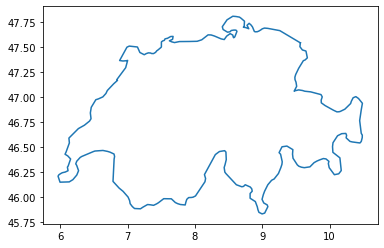

In [11]:
#plot wilayah negara swiss dengan menggunakan dataset yang diberika
plt.plot(swiss.longitude, swiss.latitude)
plt.show()

In [13]:
#mencari nilai tengah dari negara swiss, sehingga bisa dimasukan ke fungsi integral
nilai_tengah = (max(swiss.latitude) + min(swiss.latitude)) / 2

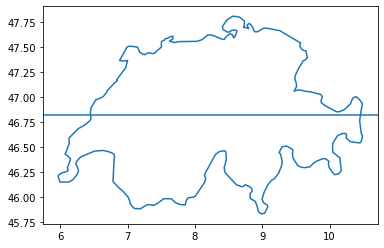

In [18]:
#membuat batas northern swiss dan southern swiss
plt.plot(swiss.longitude, swiss.latitude)
plt.axhline(y=nilai_tengah)
plt.show()

In [31]:
#sortir value dari longitude dari terkecil ke terbesar
swiss_sorted = swiss.sort_values('longitude', ascending=True)

#seleksi bagian north dan south dengan menggunakan nilai tengah
northern = swiss_sorted[swiss_sorted.latitude > nilai_tengah]
southern = swiss_sorted[swiss_sorted.latitude < nilai_tengah]

#cari nilai dari north dan south menggunakan integral trapezoid dari nilai yang sudah diseleksi
north_value = trapz(northern.latitude, northern.longitude)
south_value = trapz(southern.latitude, southern.longitude)

#kurangi nilai dari north dengan south untuk menghasilkan luas
luas = np.abs(north_value - south_value)
luas

17.516630827200032

    sehingga didapat kesimpulan bahwa luas dari wilayah swiss adalah 17.51166

a. Integral jenis apa yang diterapkan pada kasus ini? (Tertentu/Tak tentu) dan mengapa demikian? berikan alasan!

    pada kasus kali ini, yang digunakan adalah integral tertentu,
    ciri-ciri integral tertentu yaitu memiliki batas atas dan batas bawah, dan jika dikaitkan dengan perhitungan luas negara swiss di atas, diperlukan batas atas (northern) dan batas bawah (southern) untuk menghitung luas dari wilayahnya

b.Untuk kasus ini, metode apa yang kamu pakai dalam perhitungan integral? secara simbolik atau numerik, dan mengapa?

    pada kasus ini digunakan integral numerik, karena inputan dari integral adalah data points berupa nilai longitude dan latitude sebagai sumbu (x, y)

c.Library Scipy menyediakan banyak function/modul untuk menghitung integral. Function apa yang kamu gunakan dan berikan alasan yang logis!

    fungsi scipy yang digunakan adalah trapezoid, karena integral trapezoid dapat mengintegrasi data array menggunakan trapezoid method (yaitu menghitung bagian area dibawah garis kurva) sehingga cocok untuk menghitung luas wilayah tertentu 